### Import libraries and file

In [4]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [5]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [6]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [7]:
row_idx = np.array([0,11,71,74,89,103,106,130,144,150,402,503,555,641,655,687,705,711,743,879,916,929,975,1032,1065,1210,1211,1225,2229,2230,2446,2449,2535,2547,2661,2701,2747,2778,2780,2816,2875,2937,3025,3065,3066,3126,3166,3236,3478,3482,3605,3606,3677,3716,3884,3996,4197,4217,4254,4255,4265,4283,4285,4314,4411,4523,4686,4687,4765,4766,4767,4768,4769,4834,4838,4839,4840,4867,4971,5316,5359,5415,5424,5439,5470,5475,5476,5479,5538,5578,5796,5860,6016,6029,6160,6170,6356,6395,6754,7022,7175,7176,7255,7290,7420,7453,7454,7580,7677,7908,8018,8082,8288,8339,8349,8462,8692,8697,8698,8700,8798,8799,8800,8801,8802,8803,8804,8854,8855,8880,8980,9104,9258,9352,9396,9405,9441,9565,9796,9797,9798,9799,9800,9801,9819,9911,9959,10013,10039,10456,10527,10528,10642,10685,10763,10881,10907,10909,11215,11220,11223,11311,11313,11314,11328,11348,11353,11355,11356,11377,11381,11411,11431,11432,11444,11446,11472,11513,11541,11580,11614,11663,11664,11714,11715,11776,11850,11892,11994,12072,12075,12084,13397,13408,13505,13506,13614,13799,13800,13801,13802,13803,13804,13913,13923,14201,14218,14425,14610,14623,14673,14727,14764,14767,14789,14856,14909,14938,14956,14957,14959,14960,14961,14962,14964,14966,15026,15244,15292,15293,15294,15721,15752,15789,15801,15858,15868,15925,16268,16272,16273,16478,16789,16928,16999,17002,17109,17135,17209,17214,17327,17371,17582,17736,17842,17843,18044,18425,18525,18649,18657,18703,18719,18784,18874,18884,18979,19022,19023,19045,19046,19088,19090,19092,19118,19120,19185,19454,19707,20127,20203,20229,20249,20250,20314,20348,20436,20472,20492,20532,20647,20814,20815,20958,20972,21000,21066,21068,21327,21331,21350,21509,21785,21812,22265,22279,22280,22373,22458,22483,22609,22910,22911,22950,23078,23373,23555,23561,23591,23620,23625,23686,23886,24189,24264,24282,24437,24464,24556,24959,24960,24993,25104,25359,25360,25603,25604,25605,25606,25607,25608,25609,25610,25611,25612,25613,25614,25615,25616,25617,25618,25619,25620,25627,25633,25769,25788,25918,25927,25928,25929,25960,26002,26003,26028,26058,26202,26282,26310,26328,26329,26491,26618,26679,26680,26832,26876,26884,26889,26900,26906,26914,26939,26947,26949,26950,26951,26952,26953,26954,26955,26956,26957,26972,27493,27559,27560,27561,27562,27563,27564,27565,27600,27601,27698,27712,27732,27788,27792,27826,28033,28255,28691,28864,28903,28957,29147,29171,29172,29173,29174,29175,29176,29326,29346,29367,29464,29497,29505,29507,29508,29509,29534,29580,29614,29672,29909,29993,29994,29995,29996,29997,29998,29999,30000,30001,30002,30003,30004,30005,30006,30007,30008,30009,30010,30011,30012,30013,30014,30015,30016,30017,30018,30019,30020,30021,30022,30023,30024,30190,30284,30288,30404,30405,30411,30429,30490,30543,30719,30720,30830,30846,30865,30910,30971,30972,30973,30974,30980,31039,31046,31107,31118,31258,31344,31565,31610,31612,31636,31641,31706,31770,31784,31967,32008,32028,32284,32302,32371,32422,32438,32529,32625,32732,33010,33012,33136,33194,33196,33272,33319,33343,33348,33442,33513,33520,33618,33719,33731,33816,33822,34014,34033,34051,34063,34124,34125,34131,34177,34222,34315,34395,34554,34555,34556,34563,34564,34567,34571,34573,34720,34721,34722,34723,34724,34725,34726,34727,34728,34729,34730,34731,34732,34733,34734,34735,34736,34737,34738,34739,34740,34741,34742,34743,34744,34745,34746,34747,34748,34749,34903,34910,34914,34918,35010,35097,35143,35160,35298,35365,35420,35465,35570,35577,35713,35714,35715,35809,35810,35818,35882,35883,35884,35991,35993,36038,36041,36048,36049,36050,36051,36153,36162,36205,36264,36340,36413,36427,36428,36429,36512,36513,36516,36580,37187,37394,37465,37475,37507,37585,37767,37770,37830,37898,37899,37900,38517,38533,38644,38740,38741,38742,38743,38744,38745,38746,38747,38749,38750,38751,38753,38754,38755,38756,38757,38758,38759,38761,38762,38763,38764,38765,38766,38767,38768,39049,39168,39271,39320,39545,39546,39730,39737,39853,39870,39873,39937,39938,39939,39986,40102,40179,40180,40246,40473,40553,40636,40649,40968,41027,41122,41147,41278,41279,41299,41300,41601,41621,41628,41690,41757,41858,41865,41911,41962,42022,42275,42578,42590,42685,42686,42731,42765,42818,42853,42854,42855,42856,42857,42858,42859,42860,42861,42862,42863,42864,42865,42866,42867,42868,42897,42973,42974,42982,43155,43389,43479,43508,43594,43667,43709,43802,43803,43804,43898,44083,44093,44100,44178,44189,44412,44509,44576,44593,44657,44861,44943,45138,45212,45267,45309,45328,45431,45432,45589,45592,45613,45618,45747,45748,45749,45750,45751,45853,46330,46343,46346,46347,46367,46669,46888,46889,46890,46891,46892,46893,46894,46895,46896,46897,46963,46982,46983,46984,46985,46986,46988,46989,46990,46991,46992,46993,46994,46995,46996,46997,46998,46999,47000,47001,47002,47003,47004,47005,47006,47007,47008,47009,47010,47011,47019,47020,47224,47246,47325,47372,47406,47454,47461,47503,47591,47657,47707,47804,47879,47880,47984,48085,48183,48355,48437,48440,48604,48665,48666,48734,48810,48878,48883,48939,48940,48941,48943,48944,48945,48946,48947,48948,48949,49125,49409,49631,49669,49702,49951,49982,50315,50446,50647,50727,50802,50810,50992,51014,51080,51109,51348,51351,51370,51391,51393,51394,51477,51495,51497,51509,51711,51842,51843,51849,51874,51875,51888,51898,51936,51937,52280,52286,52495,52662,52706,52707,52722,52765,52813,52896,53012,53034,53046,53047,53048,53057,53260,53488,53520,53566,53595,53652,53669,53844,53942,53957,54016,54249,54304,54547,54583,54584,54837,54857,54860,54897,54898,55196,55365,55388,55530,55638,55641,55652,55653,55654,55658,55670,55735,55744,55745,55795,55931,55972,56217,56250,56427,56428,56524,56526,56541,56542,56842,56928,56982,57013,57064,57068,57072,57073,57138,57147,57160,57169,57196,57593,57669,57697,57770,57793,57794,57797,58051,58061,58447,58463,58531,58570,58713,58786,58797,58933,59057,59194,59195,59196,59202,59323,59346,59360,59483,59504,59521,59643,59704,59717,59735,59766,59847,59874,59973,60009,60221,60432,60433,60444,60631,60702,60770,60793,60794,60806,60952,60972,61077,61120,61121,61122,61211,61228,61248,61310,61311,61410,61411,61495,61510,61572,61774,62053,62068,62093,62094,62104,62119,62272,62285,62432,62438,62439,62452,62519,62530,62618,62728,62735,62736,62737,62738,62742,62743,62744,62745,62746,62747,62748,62749,62750,62751,62752,62753,62803,62804,62805,62806,62807,63376,63421,63451,63537,63663,63885,63897,64136,64243,64257,64289,64335,64389,64544,64658,64791,64822,64823,64867,64892,64916,64917,64918,64919,64920,64921,64922,64923,64924,64925,64930,65123,65129,65177,65196,65250,65254,65275,65282,65313,65604,65615,65616,65617,65618,65619,65718,65837,65954,65964,65973,66144,66150,66162,66328,66405,66457,66478,66603,66645,66911,66963,67017,67156,67768,67983,68006,68334,68389,68443,68537,68538,68539,68570,68659,68723,68724,68747,68748,68844,68845,68920,69194,69245,69259,69319,69320,69484,69667,69862,70198,70458,70605,70649,70654,70699,70794,70859,70886,70899,70932,70976,70980,70983,71044,71054,71137,71141,71416,71469,71521,71529,71542,71562,71600,71613,71614,71634,71700,71721,71780,71792,71844,71871,71889,71890,71891,71892,71893,71894,71895,71896,71897,71948,72041,72045,72060,72065,72082,72123,72125,72126,72141,72147,72164,72213,72244,72261,72262,72264,72290,72313,72314,72319,72334,72400,72501,72504,72530,72548,72617,72675,72859,72860,72865,72866,72881,72932,72933,72934,72938,72968,72969,73056,73081,73090,73097,73137,73141,73228,73247,73282,73345,73369,73392,73406,73474,73552,73605,73607,73619,73683,73715,73794,73958,74017,74026,74090,74103,74200,74218,74227,74235,74254,74272,74311,74314,74319,74337,74381,74399,74533,74595,74596,74597,74598,74609,74634,74709,74729,74783,74785,74806,74807,74844,74876,75033,75218,75219,75279,75316,75396,75533,75551,75621,75625,75644,75809,75828,75850,75856,75863,75864,75926,75936,75941,75976,75983,76081,76082,76083,76152,76153,76154,76155,76160,76203,76304,76391,76395,76466,76621,76832,76926,76971,77099,77162,77164,77280,77285,77286,77589,77656,77681,77829,77893,78119,78255,78449,78502,78503,78543,78585,78620,78621,78656,78686,78763,78767,78771,78772,78774,78775,78776,78777,78836,78930,78943,79015,79205,79223,79261,79266,79486,79574,79646,79647,79748,79757,79858,79976,80156,80157,80158,80160,80161,80216,80248,80426,80474,80560,80601,80670,80719,80720,80734,80741,80824,80825,80873,80874,80880,80898,80966,80984,81233,81289,81366,81393,81437,81461,81589,81607,81720,81799,81800,81802,81803,81805,81808,81909,82061,82121,82192,82274,82356,82363,82429,82549,82647,82650,82763,82774,82776,82867,82868,82891,82926,82959,82989,83196,83204,83217,83251,83344,83363,83376,83388,83446,83450,83451,83579,83591,83624,83631,83665,83714,83729,83749,83850,83912,83969,83970,83981,84033,84204,84294,84295,84377,84403,84405,84406,84409,84455,84634,84635,84636,84637,84638,84639,84640,84641,84642,84643,84644,84645,84646,84647,84648,84649,84650,84651,84652,84653,84654,84655,84656,84657,84658,84659,84660,84661,84662,84663,84664,84665,84666,84667,84668,84669,84670,84671,84672,84673,84674,84675,84676,84677,84678,84679,84680,84681,84682,84683,84684,84781,84926,84971,85009,85023,85167,85205,85324,85396,85442,85481,85574,85653,85676,85880,85890,86019,86082,86182,86240,86275,86276,86277,86322,86328,86416,86480,86507,86527,86541,86552,86696,86788,86859,87020,87033,87084,87088,87091,87106,87419,87478,87554,87560,87901,87904,87908,87924,87963,87964,87982,87993,88003,88124,88252,88301,88320,88350,88470,88476,88479,88490,88504,88505,88508,88516,88537,88538,88579,88617,88710,88755,88769,88816,88828,88830,88887,88888,88895,88996,89004,89021,89039,89263,89264,89294,89308,89313,89321,89322,89367,89368,89377,89390,89392,89418,89488,89507,89515,89519,89641,89647,89667,89671,89795,89818,89836,89861,89896,89917,90072,90151,90216,90236,90286,90342,90498,90504,90505,90527,90528,90642,90709,90750,90837,90885,90894,90905,90976,91003,91022,91099,91167,91255,91365,91381,91444,91487,91565,91730,91745,91763,91774,91791,91804,91805,91818,91821,92052,92067,92180,92212,92421,92521,92533,92602,92612,92758,92878,92909,93016,93154,93208,93214,93227,93325,93516,93566,93686,93947,94014,94015,94154,94249,94288,94310,94313,94320,94427,94437,94498,94499,94517,94556,94566,94689,94710,94869,94876,94879,94894,94915,94919,95181,95183,95187,95210,95449])

In [8]:
matrix_sliced = matrix[row_idx, :]

In [9]:
matrix_sliced.shape

(1725, 1226)

In [10]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [11]:
upper_sm_sliced.shape

(1486950,)

In [12]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [13]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [14]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

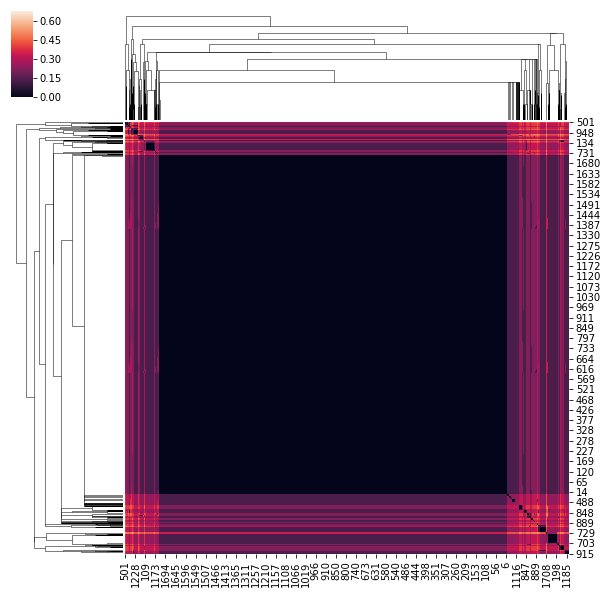

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

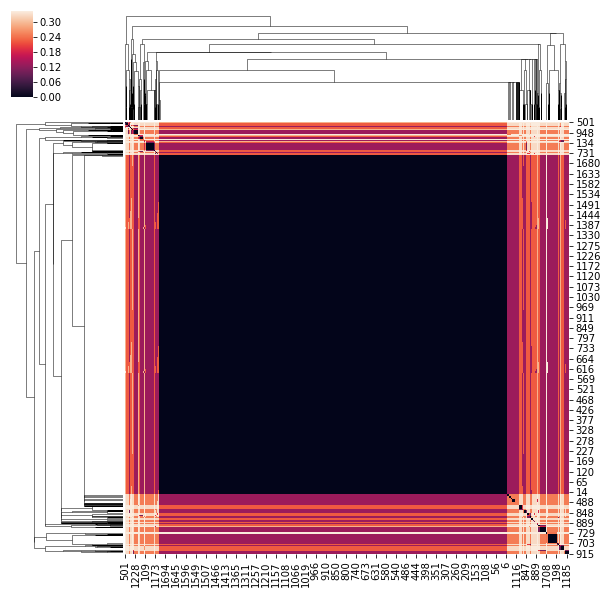

In [16]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

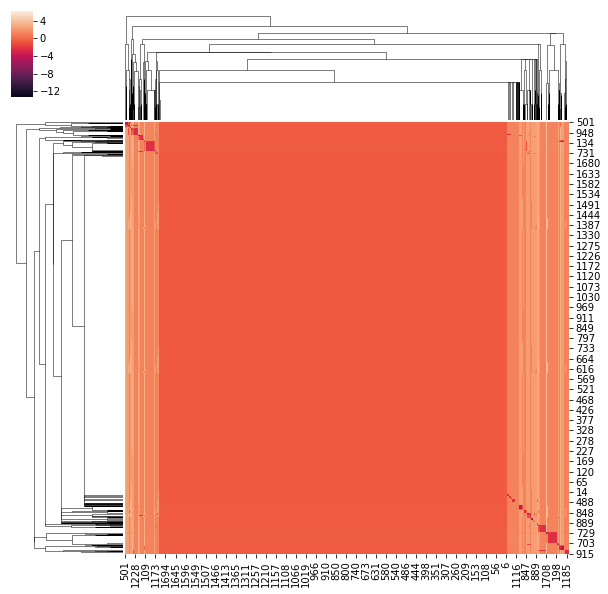

In [17]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

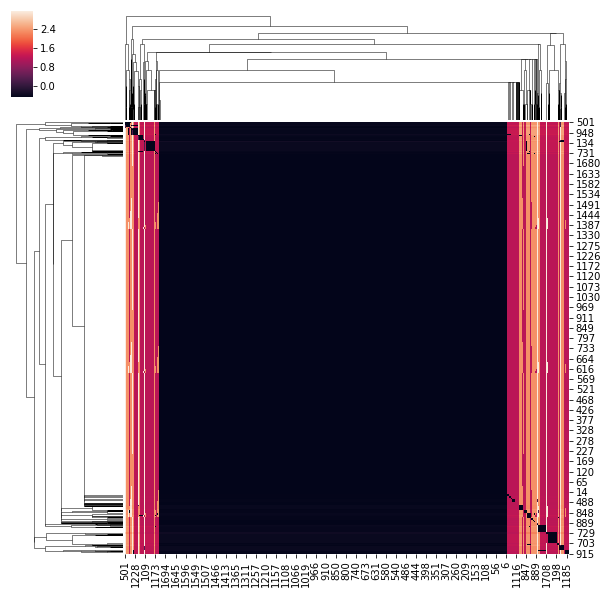

In [18]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)